127.0


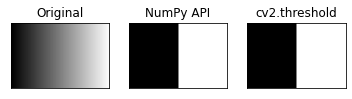

In [3]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('img/gray_gradient.jpg', cv2.IMREAD_GRAYSCALE) # 이미지를 그레이 스케일로 읽기

# --- ① NumPy API로 바이너리 이미지 만들기
thresh_np = np.zeros_like(img)   # 원본과 동일한 크기의 0으로 채워진 이미지 - 검정
thresh_np[img > 127] = 255      # 127 보다 큰 값만 255로 변경 - 흰색

# ---② OpenCV API로 바이너리 이미지 만들기
ret, thresh_cv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) # binary가 기본
print(ret)  # 127.0, 바이너리 이미지에 사용된 문턱 값 반환

# ---③ 원본과 결과물을 matplotlib으로 출력
imgs = {'Original': img, 'NumPy API':thresh_np, 'cv2.threshold': thresh_cv}
for i , (key, value) in enumerate(imgs.items()): # 뒤에 나오는 녀석들에 인덱스 값 주기
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])

plt.show()

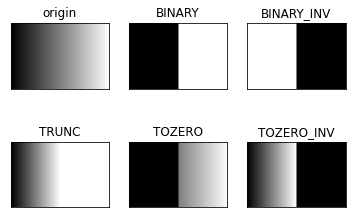

In [4]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('img/gray_gradient.jpg', cv2.IMREAD_GRAYSCALE)

_, t_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, t_bininv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, t_truc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, t_2zr = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, t_2zrinv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)


imgs = {'origin':img, 'BINARY':t_bin, 'BINARY_INV':t_bininv, 
        'TRUNC':t_truc, 'TOZERO':t_2zr, 'TOZERO_INV':t_2zrinv}

for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(2,3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]);    plt.yticks([])
    
plt.show()

어디를 잘라야 할지... 보기 위해서는 히스토그램을 얻은 다음에 끊도록...

오츠 OTSU 알고리즘? 자동으로 끊게 

분산이 적다는 것은 적게 퍼져있다. 적절한 값에 자리잡아있다라는 의미.

따라서 분산이 가장 적게 있는 곳에 있는 것이 오츠 알고리즘 이래...

그래서 가장 작은 분산값을 찾아서 바이너리제이션 해주면 된다네...

otsu threshold: 131.0


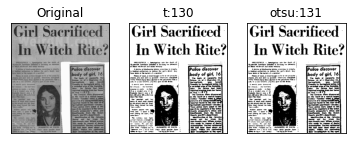

In [5]:
import cv2
import numpy as np
import matplotlib.pylab as plt

# 이미지를 그레이 스케일로 읽기
img = cv2.imread('img/scaned_paper.jpg', cv2.IMREAD_GRAYSCALE) 
# 경계 값을 130으로 지정  ---①
_, t_130 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)  # 사람이 130이라는 값       
# 경계 값을 지정하지 않고 OTSU 알고리즘 선택 ---②
t, t_otsu = cv2.threshold(img, -1, 255,  cv2.THRESH_BINARY | cv2.THRESH_OTSU) 
print('otsu threshold:', t)                 # Otsu 알고리즘으로 선택된 경계 값 출력
# 옵션 여러개 줄때는 | 를 쓴다.

imgs = {'Original': img, 't:130':t_130, 'otsu:%d'%t: t_otsu}
for i , (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])

plt.show()

4.3.3

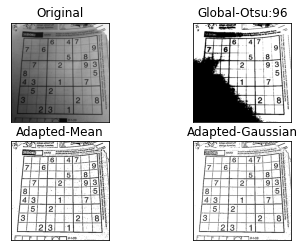

In [6]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

blk_size = 9        # 블럭 사이즈
C = 5 # 차감 상수 
img = cv2.imread('img/sudoku.png', cv2.IMREAD_GRAYSCALE) # 그레이 스케일로  읽기

# ---① 오츠의 알고리즘으로 단일 경계 값을 전체 이미지에 적용
ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# ---② 어뎁티드 쓰레시홀드를 평균과 가우시안 분포로 각각 적용
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, blk_size, C)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                     cv2.THRESH_BINARY, blk_size, C)

# ---③ 결과를 Matplot으로 출력
imgs = {'Original': img, 'Global-Otsu:%d'%ret:th1,
        'Adapted-Mean':th2, 'Adapted-Gaussian': th3}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v,'gray')
    plt.xticks([]),plt.yticks([])

plt.show()

### 4.4 이미지 연산
* dest = cv2.add(src1, src2 [, dest, mask, dtype]): src1과 src2 더하기
    *
    
    
    
    * mask: 0이 아닌 픽셀만 연산

In [37]:
import cv2
import numpy as np

a = np.uint8([[200,50]])
b = np.uint8([[100,100]])
add1 = a + b # overflow 된다!
add2 = cv2.add(a,b) # limit이 알아서 최대값으로 바꿔준다

print(add1, add2)

[[ 44 150]] [[255 150]]


In [42]:
import cv2
import numpy as np

#---① 연산에 사용할 배열 생성
a = np.array([[1, 2]], dtype=np.uint8)
b = np.array([[10, 20]], dtype=np.uint8)
#---② 2번째 요소가 0인 마스크 배열 생성 
mask = np.array([[1, 0]], dtype=np.uint8)

#---③ 누적 할당과의 비교 연산
c1 = cv2.add( a, b , None, mask)
print(c1)
c2 = cv2.add( a, b , b.copy(), mask)
print(c2, b)


[[11  0]]
[[11 20]] [[10 20]]


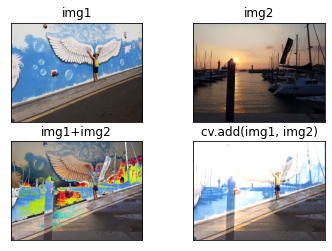

In [45]:
import cv2
import numpy as np
import matplotlib.pylab as plt

# ---① 연산에 사용할 이미지 읽기
img1 = cv2.imread('img/wing_wall.jpg')
img2 = cv2.imread('img/yate.jpg')

# ---② 이미지 덧셈
img3 = img1 + img2  # 더하기 연산
img4 = cv2.add(img1, img2) # OpenCV 함수

imgs = {'img1':img1, 'img2':img2, 'img1+img2': img3, 'cv.add(img1, img2)': img4}

# ---③ 이미지 출력
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2, i + 1)
    plt.imshow(v[:,:,::-1])
    plt.title(k)
    plt.xticks([]); plt.yticks([])

plt.show()

In [49]:
import cv2
import numpy as np

#---① 합성에 사용할 영상 읽기
img1 = cv2.imread('img/wing_wall.jpg')
img2 = cv2.imread('img/yate.jpg')

alpha = 0.5 # 합성에 사용할 알파 값

# ---② NumPy 배열에 수식을 직접 연산해서 알파 블렌딩 적용
blended = img1 * alpha + img2 * (1-alpha)
blended = blended.astype(np.uint8) # 소수점 발생을 제거하기 위함

# ---③ addWeighted() 함수로 알파 블렌딩 적용
dest = cv2.addWeighted(img1, alpha, img2, (1-alpha), 0)

cv2.imshow('img1 * alpha + img2 * (1-alpha)', blended)
cv2.imshow('cv2.addWeighted', dest)

cv2.waitKey(0)
cv2.destroyAllWindows()

# 위 경우에는 둘 다 똑같다!

In [50]:
import cv2
import numpy as np

win_name = 'Alpha blending'     # 창 이름
trackbar_name = 'fade'          # 트렉바 이름

# ---① 트렉바 이벤트 핸들러 함수
def onChange(x):
    alpha = x/100
    dst = cv2.addWeighted(img1, 1-alpha, img2, alpha, 0) 
    cv2.imshow(win_name, dst)


# ---② 합성 영상 읽기
img1 = cv2.imread('img/man_face.jpg')
img2 = cv2.imread('img/lion_face.jpg')

# ---③ 이미지 표시 및 트렉바 붙이기
cv2.imshow(win_name, img1)
cv2.createTrackbar(trackbar_name, win_name, 0, 100, onChange)

cv2.waitKey()
cv2.destroyAllWindows()

# 트렉바 다시 돌아가서 공부하자~~

## 4.4.3 비트와이즈 연산
* 


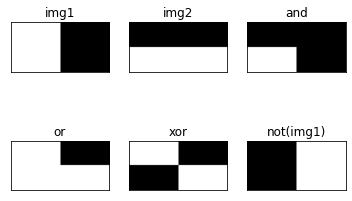

In [56]:
import numpy as np, cv2
import matplotlib.pylab as plt

#--① 연산에 사용할 이미지 생성
img1 = np.zeros((200,400), dtype=np.uint8)
img2 = np.zeros((200,400), dtype=np.uint8)
img1[:,:200] = 255 # 좌측 절반 흰색으로
img2[100:200, :] = 255 # 아래 절반 흰색으로

#--② 비트와이즈 연산
bitAnd = cv2.bitwise_and(img1, img2)
bitOr = cv2.bitwise_or(img1, img2)
bitXor = cv2.bitwise_xor(img1, img2)
bitNot = cv2.bitwise_not(img1)

#--③ Plot으로 결과 출력
imgs = {'img1':img1, 'img2':img2, 'and':bitAnd, 
          'or':bitOr, 'xor':bitXor, 'not(img1)':bitNot}
for i, (title, img) in enumerate(imgs.items()):
    plt.subplot(2,3,i+1)
    plt.title(title)
    plt.imshow(img, 'gray')
    plt.xticks([]); plt.yticks([])

plt.show()

In [67]:
import numpy as np, cv2
import matplotlib.pylab as plt

#--① 이미지 읽기
img = cv2.imread('img/girl.jpg')

#--② 마스크 만들기 - 이미지와 똑같은 크기로 만들어주어야 한다!
mask = np.zeros_like(img)
cv2.circle(mask, (150,140), 100, (255,255,255), -1)
#cv2.circle(대상이미지, (원점x, 원점y), 반지름, (색상), 채우기)

#--③ 마스킹
masked = cv2.bitwise_and(img, mask)

#--④ 결과 출력
cv2.imshow('original', img)
cv2.imshow('mask', mask)
cv2.imshow('masked', masked)
cv2.waitKey()
cv2.destroyAllWindows()

In [66]:
import numpy as np, cv2

#--① 연산에 필요한 영상을 읽고 그레이스케일로 변환
img1 = cv2.imread('img/robot_arm1.jpg')
img2 = cv2.imread('img/robot_arm2.jpg')
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#--② 두 영상의 절대값 차 연산
diff = cv2.absdiff(img1_gray, img2_gray)

#--③ 차 영상을 극대화 하기 위해 쓰레시홀드 처리 및 컬러로 변환
_, diff = cv2.threshold(diff, 1, 255, cv2.THRESH_BINARY)
diff_red = cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)
diff_red[:,:,2] = 0

#--④ 두 번째 이미지에 변화 부분 표시
spot = cv2.bitwise_xor(img2, diff_red)

#--⑤ 결과 영상 출력
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('diff', diff)
cv2.imshow('spot', spot)
cv2.waitKey()
cv2.destroyAllWindows()

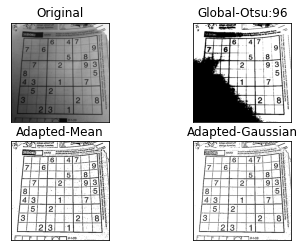

In [3]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

blk_size = 9        # 블럭 사이즈
C = 5               # 차감 상수 
img = cv2.imread('img/sudoku.png', cv2.IMREAD_GRAYSCALE) # 그레이 스케일로  읽기

# ---① 오츠의 알고리즘으로 단일 경계 값을 전체 이미지에 적용
ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# ---② 어뎁티드 쓰레시홀드를 평균과 가우시안 분포로 각각 적용
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, blk_size, C)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY, blk_size, C)

# ---③ 결과를 Matplot으로 출력
imgs = {'Original': img, 'Global-Otsu:%d'%ret:th1, 
        'Adapted-Mean':th2, 'Adapted-Gaussian': th3}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v,'gray')
    plt.xticks([]),plt.yticks([])

plt.show()

## alpha channel 을 가지면 자연스러운 합성이 가능하다~!

In [7]:
import cv2
import numpy as np 

img_fg = cv2.imread('img/opencv_logo.png', cv2.IMREAD_UNCHANGED)
img_bg = cv2.imread('img/girl.jpg')
#logo 부분에 적용할 마스크, background에 적용할 마스크

#마스크 만들기 스레스홀드로 이미지 뽑아내기!
_, mask = cv2.threshold(img_fg[:,:,3], 1, 255, cv2.THRESH_BINARY) #alpha channel에 관해서만
mask_inv = cv2.bitwise_not(mask)

img_fg = cv2.cvtColor(img_fg, cv2.COLOR_BGRA2BGR)
h, w = img_fg.shape[:2]
roi = img_bg[10:10+h, 10:10+w]

masked_fg = cv2.bitwise_and(img_fg, img_fg, mask=mask) # 원하는 영역만 255가 되어있는거야
masked_bg = cv2.bitwise_and(roi, roi, mask=mask_inv) # log image 하얀거 까만거..

added = masked_fg + masked_bg
img_bg[10:10+h, 10:10+w] = added
cv2.imshow('result', img_bg)
cv2.waitKey()
cv2.destroyAllWindows()

# 단, 포그라운드에 넣으려면, 반드시 알파채널이 존재해야 한다.

# 따라서 앞으로 할 땐.. 특정한 색깔을 이용해서 잘라내던지,
# 아니면 합성 비율을 적절히 조절해서 배경을 합성하던지.
# 알파채널 있는 사진이 얼마나 있겠냐.

* dst = cv2.inRange(img, from, to)  // 색깔의 배열 영역의 색깔 모음을 사용하는거야!
    // 해당 범위의 마스크를 만든거다 라고 생각하면 돼요.
    * img: 입력 영상
    * from: 범위의
    * to: 범위의 끝 배열
    * dst: img가 from~to에 포함되면 255, 아니면 0을 픽셀값으로 하는 배열
    색깔의 범위를 정할때는 hsv로 cvtColor 한다음에 사용한다.
    마찬가지로...

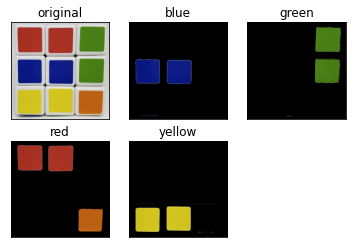

In [2]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 큐브 영상 읽어서 HSV로 변환
img = cv2.imread("img/cube.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#--② 색상별 영역 지정
blue1 = np.array([90, 50, 50])
blue2 = np.array([120, 255,255])
green1 = np.array([45, 50,50])
green2 = np.array([75, 255,255])
red1 = np.array([0, 50,50])
red2 = np.array([15, 255,255])
red3 = np.array([165, 50,50])
red4 = np.array([180, 255,255])
yellow1 = np.array([20, 50,50])
yellow2 = np.array([35, 255,255])

# --③ 색상에 따른 마스크 생성
mask_blue = cv2.inRange(hsv, blue1, blue2)
mask_green = cv2.inRange(hsv, green1, green2)
mask_red = cv2.inRange(hsv, red1, red2)
mask_red2 = cv2.inRange(hsv, red3, red4)
mask_yellow = cv2.inRange(hsv, yellow1, yellow2)

#--④ 색상별 마스크로 색상만 추출
res_blue = cv2.bitwise_and(img, img, mask=mask_blue)
res_green = cv2.bitwise_and(img, img, mask=mask_green)
res_red1 = cv2.bitwise_and(img, img, mask=mask_red)
res_red2 = cv2.bitwise_and(img, img, mask=mask_red2)
res_red = cv2.bitwise_or(res_red1, res_red2)
res_yellow = cv2.bitwise_and(img, img, mask=mask_yellow)

#--⑤ 결과 출력
imgs = {'original': img, 'blue':res_blue, 'green':res_green, 
                            'red':res_red, 'yellow':res_yellow}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,3, i+1)
    plt.title(k)
    plt.imshow(v[:,:,::-1])
    plt.xticks([]); plt.yticks([])
plt.show()


In [4]:
# 크 로 마 키 부 분 . . . . 차근차근 해보자 . . . .
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 크로마키 배경 영상과 합성할 배경 영상 읽기
img1 = cv2.imread('img/man_chromakey.jpg')
img2 = cv2.imread('img/street.jpg')

#--② ROI 선택을 위한 좌표 계산
height1, width1 = img1.shape[:2]
height2, width2 = img2.shape[:2]
x = (width2 - width1)//2
y = height2 - height1
w = x + width1
h = y + height1

#--③ 크로마키 배경 영상에서 크로마키 영역을 10픽셀 정도로 지정
chromakey = img1[:10, :10, :]
offset = 20

#--④ 크로마키 영역과 영상 전체를 HSV로 변경
hsv_chroma = cv2.cvtColor(chromakey, cv2.COLOR_BGR2HSV)
hsv_img = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

#--⑤ 크로마키 영역의 H값에서 offset 만큼 여유를 두어서 범위 지정
# offset 값은 여러차례 시도 후 결정
#chroma_h = hsv_chroma[0]
chroma_h = hsv_chroma[:,:,0]
lower = np.array([chroma_h.min()-offset, 100, 100])
upper = np.array([chroma_h.max()+offset, 255, 255])

#--⑥ 마스크 생성 및 마스킹 후 합성
mask = cv2.inRange(hsv_img, lower, upper)
mask_inv = cv2.bitwise_not(mask)
roi = img2[y:h, x:w]
fg = cv2.bitwise_and(img1, img1, mask=mask_inv)
bg = cv2.bitwise_and(roi, roi, mask=mask)
img2[y:h, x:w] = fg + bg

#--⑦ 결과 출력
cv2.imshow('chromakey', img1)
cv2.imshow('added', img2)
cv2.waitKey()
cv2.destroyAllWindows()

* des = cv2.seamlessClone(src, dst, mask, coords, flags [,output])
    * src: 입력 영상, 일반적으로 전경
    * dst: 
    

In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt
 
#--① 합성 대상 영상 읽기
img1 = cv2.imread("img/drawing.jpg")
img2= cv2.imread("img/my_hand.jpg")

#--② 마스크 생성, 합성할 이미지 전체 영역을 255로 셋팅
mask = np.full_like(img1, 255)
 
#--③ 합성 대상 좌표 계산(img2의 중앙)
height, width = img2.shape[:2]
center = (width//2, height//2)
 
#--④ seamlessClone 으로 합성 
normal = cv2.seamlessClone(img1, img2, mask, center, cv2.NORMAL_CLONE)
mixed = cv2.seamlessClone(img1, img2, mask, center, cv2.MIXED_CLONE)

#--⑤ 결과 출력
cv2.imshow('normal', normal)
cv2.imshow('mixed', mixed)
cv2.waitKey()
cv2.destroyAllWindows()

## 4.5 히스토그램
* cv2.calcHist(img, channel, mask, histSize, ranges)
    * img: 입력 영상, [img]형태로 리스트로 감싸서 표현해야 한다.
    * channel: 처리할 채널, 리스트로 감싸서 표현
        * 1채널: [0], 2, 3채널
    * mask: 마스크에 지정한 픽셀만 히스토그램 계산 (보통 사용 잘 안함)
    * histSize: 계급(bin)의 개수, 채널 개수에 맞게 리스트로 표현
    * ranges: 각 픽셀이 가질 수 있는 값의 범위, RGB인 경우[0,256]

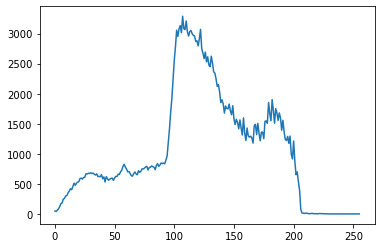

(256, 1)
(450, 600)


In [4]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('img/mountain.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('img', img)

hist = cv2.calcHist([img], [0], None, [256], [0,256])
plt.plot(hist)
plt.show()
print(hist.shape)
print(img.shape)

cv2.waitKey()
cv2.destroyAllWindows()
# x축 값 0~255 밝기. 0쪽은 어두운, 검정색. 255쪽은 밝은, 하얀색?
# min, max가 0~255 면 스트레칭이 안된다!! 똑같아져요.??? 정확히 무슨말이지

(450, 600, 3)
(450, 600)


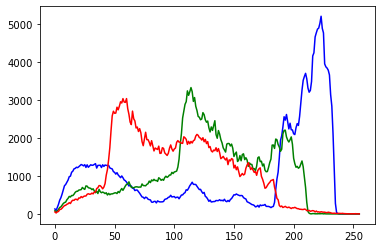

In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('img/mountain.jpg')
cv2.imshow('img', img)

channels = cv2.split(img)
print(img.shape)
print(channels[0].shape)
hist_b = cv2.calcHist([channels[0]], [0], None, [256], [0,256])
plt.plot(hist_b, color='b')
hist_g = cv2.calcHist([channels[1]], [0], None, [256], [0,256])
plt.plot(hist_g, color='g')
hist_r = cv2.calcHist([channels[2]], [0], None, [256], [0,256])
plt.plot(hist_r, color='r')

plt.show()
cv2.waitKey()
cv2.destroyAllWindows()
# 세로는 배열에 존재하는 해당 밝기의 픽셀수!? 가로는 밝기 0~255 사이!?

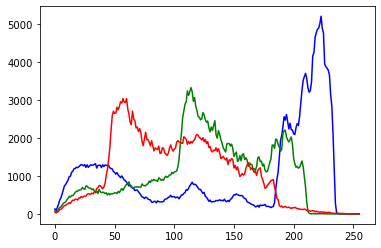

In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 이미지 읽기 및 출력
img = cv2.imread('img/mountain.jpg')
cv2.imshow('img', img)

#--② 히스토그램 계산 및 그리기
channels = cv2.split(img)
colors = ('b', 'g', 'r')
for (ch, color) in zip(channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 255])
    plt.plot(hist, color = color)
plt.show()
cv2.waitKey()
cv2.destroyAllWindows()

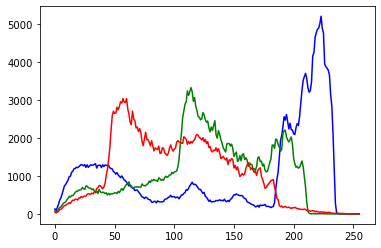

In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 이미지 읽기 및 출력
img = cv2.imread('img/mountain.jpg')
cv2.imshow('img', img)

#--② 히스토그램 계산 및 그리기
colors = ('b', 'g', 'r')
for i in range(3):
    hist = cv2.calcHist([img], [i], None, [256], [0, 255])
    plt.plot(hist, color = colors[i])
plt.show()
cv2.waitKey()
cv2.destroyAllWindows()

## 4.5.2 노멀라이즈
* dst = cv2.normalize(src, dst, alpha, beta, type_flag)


    * MINMAX 만 거의 쓴답니다. 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45684 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54632 missing from c

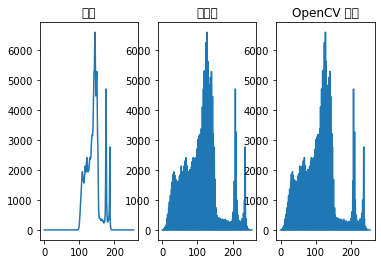

In [2]:
import cv2
import numpy as np
import matplotlib.pylab as plt


img = cv2.imread('img/abnormal.jpg', cv2.IMREAD_GRAYSCALE)

img_f = img.astype(np.float32)
img_norm = ((img_f - img_f.min()) * 255) / (img_f.max() - img_f.min())
img_norm = img_norm.astype(np.uint8)
# 이미지의 픽셀값을 바꾼 것!

img_norm2 = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

hist = cv2.calcHist([img], [0], None, [256], [0,256])
hist_norm = cv2.calcHist([img_norm], [0], None, [256], [0,256])
hist_norm2 = cv2.calcHist([img_norm2], [0], None, [256], [0,256])

cv2.imshow('Befor', img)
cv2.imshow('Manual', img_norm)
cv2.imshow('cv2.normalize()', img_norm2)

hists = {'원본' : hist, '매뉴얼':hist_norm, 'OpenCV 함수':hist_norm2}
for i, (k, v) in enumerate(hists.items()):
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.plot(v)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

## 4.5.3 이퀄라이즈

* dst = cv2.equalizeHist(src[, dst])
  * src : 대상 이미지, 8비트 1채널
  * dst : 결과 이미지

(256,)


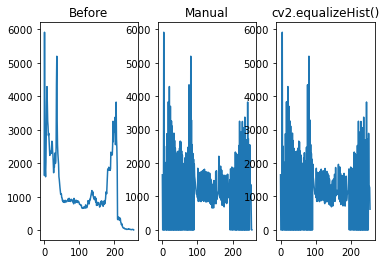

In [2]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 대상 영상으로 그레이 스케일로 읽기
img = cv2.imread('img/yate.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape[:2]

#--② 이퀄라이즈 연산을 직접 적용
hist = cv2.calcHist([img], [0], None, [256], [0, 256]) #히스토그램 계산
cdf = hist.cumsum() # 누적 확률 함수            # 누적 히스토그램 합 구하는 함수
cdf_m = np.ma.masked_equal(cdf, 0)                    # 0(zero)인 값을 NaN으로 제거
cdf_m = (cdf_m - cdf_m.min()) /(rows * cols) * 255   # 이퀄라이즈 히스토그램 계산
                    #분모 / 전체 이미지 크기
cdf = np.ma.filled(cdf_m,0).astype('uint8')             # NaN을 다시 0으로 환원
print(cdf.shape)
img2 = cdf[img]                                         # 히스토그램을 픽셀로 맵핑


#--③ OpenCV API로 이퀄라이즈 히스토그램 적용
img3 = cv2.equalizeHist(img) # 오픈CV로 하면 한줄로 끝남...
# 따라서 굳이 매뉴얼로 할 필요 없다.


#--④ 이퀄라이즈 결과 히스토그램 계산
hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])
hist3 = cv2.calcHist([img3], [0], None, [256], [0, 256])

#--⑤ 결과 출력
cv2.imshow('Before', img)
cv2.imshow('Manual', img2)
cv2.imshow('cv2.equalizeHist()', img3)
hists = {'Before':hist, 'Manual':hist2, 'cv2.equalizeHist()':hist3}
for i, (k, v) in enumerate(hists.items()):
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.plot(v)
plt.show()
cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
import numpy as np, cv2
img = cv2.imread('img/yate.jpg')
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
img2 = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

cv2.imshow('Before', img)
cv2.imshow('After', img2)
cv2.waitKey()
cv2.destroyAllWindows()

## 4.5.4 CLAHE

* Contrast Limiting Adaptive Histogram Equalization (대비 제한 히스토그램 평활화) 
* clahe = cv2.createCLAHE(clipLimit, tileGridSize): CLAHE 생성
  * clipLimit: Contrast 제한 경계값, 기본 40.00
  * tileGridSize: 영역 크기, 기본 8x8
  * clahe: 생성된 CLAHE 객체
* clahe.apply(src): CLAHE 적용
  * src: 입력 영상
  
  밝기 값을 제한해서 그 제한된 부분은 

In [6]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--①이미지 읽어서 YUV 컬러스페이스로 변경
img = cv2.imread('img/bright.jpg')
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

#--② 밝기 채널에 대해서 이퀄라이즈 적용
img_eq = img_yuv.copy()
img_eq[:,:,0] = cv2.equalizeHist(img_eq[:,:,0])
img_eq = cv2.cvtColor(img_eq, cv2.COLOR_YUV2BGR)

#--③ 밝기 채널에 대해서 CLAHE 적용
img_clahe = img_yuv.copy()
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8)) #CLAHE 생성
img_clahe[:,:,0] = clahe.apply(img_clahe[:,:,0])           #CLAHE 적용
img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_YUV2BGR)

#--④ 결과 출력
cv2.imshow('Before', img)
cv2.imshow('CLAHE', img_clahe)
cv2.imshow('equalizeHist', img_eq)
cv2.waitKey()
cv2.destroyAllWindows()

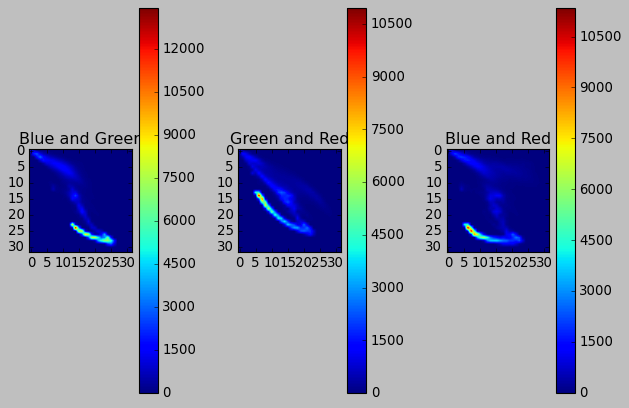

In [9]:
import cv2
import matplotlib.pylab as plt

plt.style.use('classic')            # --①컬러 스타일을 1.x 스타일로 사용
img = cv2.imread('img/mountain.jpg')

plt.subplot(131)
hist = cv2.calcHist([img], [0,1], None, [32,32], [0,256,0,256]) #--②
p = plt.imshow(hist)                                            #--③
plt.title('Blue and Green')                                     #--④
plt.colorbar(p)                                                 #--⑤


plt.subplot(132)
hist = cv2.calcHist([img], [1,2], None, [32,32], [0,256,0,256]) #--⑥
p = plt.imshow(hist)
plt.title('Green and Red')
plt.colorbar(p)

plt.subplot(133)
hist = cv2.calcHist([img], [0,2], None, [32,32], [0,256,0,256]) #--⑦
p = plt.imshow(hist)
plt.title('Blue and Red')
plt.colorbar(p)

plt.tight_layout()
plt.show()

# 파란색과 초록색을 동시에 가지는 픽셀을 분포로 보고싶을 때 쓰는거야!

# 그림 전체 픽셀에 대해서 해당 색깔을 동시에 포함하는 분포를 나타낸 것??
# 쓰는 목적..?

## 4.5.6 역투영

* cv2.calcBackProject(img, channel, his, ranges, scale)
  * img: 입력 영상, [img]
  * channel: 처리할 채널, [channel]
  * hist: 역투영에 사용할 히스토그램
  * ranges: 각 픽셀이 가질 수 있는 값의 범위
  * scale: 결과에 적용할 배율 계수
  
  크로마키랑 비슷한 효과를 낸다.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

win_name = 'back_projection'
img = cv2.imread('img/pump_horse.jpg')
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
draw = img.copy() # 원본 카피


def masking(bp, win_name):
    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    cv2.filter2D(bp,-1,disc,bp) # 몰라도 돼. 부드럽게 하는..
    
    _, mask = cv2.threshold(bp, 1, 255, cv2.THRESH_BINARY)
    result = cv2.bitwise_and(img, img, mask=mask)
    cv2.imshow(win_name, result)

    
def backProject_manual(hist_roi):
    hist_img = cv2.calcHist([hsv_img], [0,1], None, [180,256], [0,180,0,256])
#    print(hist_img.shape)
#    print(hist_img)
    
    # hist_rate는 180,256 모양이고 대부분 0일꺼고,
    #roi와 img 둘 다 값이 있는 부분만 가질 것이다.
    hist_rate = hist_roi / (hist_img+1) # 비율..
#    print(hist_rate)
    h, s, v = cv2.split(hsv_img)
#    print(h.shape)
#    print(h)
    bp = hist_rate[h.ravel(), s.ravel()]
    print(bp.shape)
    print(bp)
    bp = np.minimum(bp,1) # 1 이상의 값은 모두 1로 만들기
    bp = bp.reshape(hsv_img.shape[:2])
    cv2.normalize(bp,bp,0,255,cv2.NORM_MINMAX)
    bp = bp.astype(np.uint8)
    masking(bp, 'result_manual')
    

# OpenCV를 이용한 함수. 명도, 채도 이용...
def backProject_cv(hist_roi):
    bp = cv2.calcBackProject([hsv_img], [0,1], hist_roi, [0,180,0,256], 1)
    # roi의 히스토그램과 유사한 픽셀들만 큰 값을 가지게 하고, 나머지는 0을 가지게 하는.
    masking(bp, 'result_cv')
    

# roi 잡기!
(x,y,w,h) = cv2.selectROI(win_name, img, False)
if w > 0 and h > 0:
    roi = draw[y:y+h, x:x+w]
    cv2.rectangle(draw, (x,y), (x+w,y+h), (0,0,255), 2)
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    # 히스토그램 구하기 # 180: h 휴 색상, 256: s 세튜레이션 채도
    hist_roi = cv2.calcHist([hsv_roi], [0,1], None, [180, 256], [0,180, 0,256])
#    print(hist_roi.shape)
#    print(hist_roi)
    backProject_manual(hist_roi) # 매뉴얼
    backProject_cv(hist_roi) # OpenCV
    
    
cv2.imshow(win_name, draw)
cv2.waitKey()
cv2.destroyAllWindows()

(172800,)
[0. 0. 0. ... 0. 0. 0.]


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

win_name = 'back_projection'
img = cv2.imread('img/pump_horse.jpg')
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
draw = img.copy()

#--⑤ 역투영된 결과를 마스킹해서 결과를 출력하는 공통함수
def masking(bp, win_name):
    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    cv2.filter2D(bp,-1,disc,bp)
    _, mask = cv2.threshold(bp, 1, 255, cv2.THRESH_BINARY)
    result = cv2.bitwise_and(img, img, mask=mask)
    cv2.imshow(win_name, result)

#--⑥ 직접 구현한 역투영 함수
def backProject_manual(hist_roi):
    #--⑦ 전체 영상에 대한 H,S 히스토그램 계산
    hist_img = cv2.calcHist([hsv_img], [0,1], None,[180,256], [0,180,0,256])
    #--⑧ 선택영역과 전체 영상에 대한 히스토그램 그램 비율계산
    hist_rate = hist_roi/ (hist_img + 1)
    #--⑨ 비율에 맞는 픽셀 값 매핑
    h,s,v = cv2.split(hsv_img)
    bp = hist_rate[h.ravel(), s.ravel()]
    bp = np.minimum(bp, 1)
    bp = bp.reshape(hsv_img.shape[:2])
    cv2.normalize(bp,bp, 0, 255, cv2.NORM_MINMAX)
    bp = bp.astype(np.uint8)
    #--⑩ 역 투영 결과로 마스킹해서 결과 출력
    masking(bp,'result_manual')
 
# OpenCV API로 구현한 함수 ---⑪ 
def backProject_cv(hist_roi):
    # 역투영 함수 호출 ---⑫
    bp = cv2.calcBackProject([hsv_img], [0, 1], hist_roi,  [0, 180, 0, 256], 1)
    # 역 투영 결과로 마스킹해서 결과 출력 ---⑬ 
    masking(bp,'result_cv')

# ROI 선택 ---①
(x,y,w,h) = cv2.selectROI(win_name, img, False)
if w > 0 and h > 0:
    roi = draw[y:y+h, x:x+w]
    cv2.rectangle(draw, (x, y), (x+w, y+h), (0,0,255), 2)
    #--② 선택한 ROI를 HSV 컬러 스페이스로 변경
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    #--③ H,S 채널에 대한 히스토그램 계산
    hist_roi = cv2.calcHist([hsv_roi],[0, 1], None, [180, 256], [0, 180, 0, 256] )
    #--④ ROI의 히스토그램을 매뉴얼 구현함수와 OpenCV 이용하는 함수에 각각 전달
    backProject_manual(hist_roi)
    backProject_cv(hist_roi)
cv2.imshow(win_name, draw)
cv2.waitKey()
cv2.destroyAllWindows()

## 4.5.7 히스토그램 비교

* cv2.compareHist(hist1, hist2, method)
  * hist1, hist2: 비교할 2개의 히스토그램, 크기와 차원이 같아야 함
  * method: 비교 알고리즘 선택 플래그 상수
    * cv2.HISTCOMP_CORREL: 상관관계(1: 완전 일치, -1: 최대 불일치, 0: 무관계)
    * cv2.HISTCOMP_CHISQR: 카이제곱(0: 완전 일치, 큰값(미정): 최대 불일치)
    * cv2.HISTCOMP_INTERSECT: 교차(1: 완전 일치, 0: 최대 불일치(1로 정규화한 경우)) #얼마나 교차?
    * cv2.HISTCOMP_BHATTACHARYYA: 바타차야(0: 완전 일치, 1: 최대 불일치) #그래프가 얼마나 다른가?
    * cv2.HISTCOMP_HELLINGER: HISTCOMP_BHATTACHARYYA와 동일  #분산이 다르면
    
히스토그램의 형태만 보고 두 이미지가 얼마나 유사한지 비교!! (GRAYSCALE이면 밝기의 분포, RGB면 색깔들의 분포)

CORREL    	img1:   1.00	img2:   0.70	img3:   0.56	img4:   0.23	
CHISQR    	img1:   0.00	img2:  67.33	img3:  35.71	img4:1129.49	
INTERSECT 	img1:   1.00	img2:   0.54	img3:   0.40	img4:   0.18	
BHATTACHARYYA	img1:   0.00	img2:   0.48	img3:   0.47	img4:   0.79	


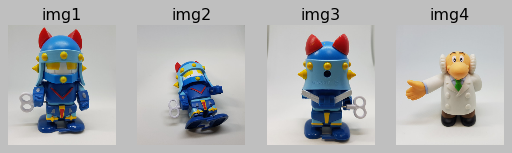

In [13]:
import cv2, numpy as np
import matplotlib.pylab as plt

img1 = cv2.imread('img/taekwonv1.jpg')
img2 = cv2.imread('img/taekwonv2.jpg')
img3 = cv2.imread('img/taekwonv3.jpg')
img4 = cv2.imread('img/dr_ochanomizu.jpg')

cv2.imshow('query', img1)
imgs = [img1, img2, img3, img4]
hists = []
for i, img in enumerate(imgs) :
    plt.subplot(1,len(imgs),i+1)
    plt.title('img%d'% (i+1))
    plt.axis('off') 
    plt.imshow(img[:,:,::-1])
    #---① 각 이미지를 HSV로 변환
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    #---② H,S 채널에 대한 히스토그램 계산
    hist = cv2.calcHist([hsv], [0,1], None, [180,256], [0,180,0, 256])
    #---③ 0~1로 정규화
    cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
    hists.append(hist)


query = hists[0]
methods = {'CORREL' :cv2.HISTCMP_CORREL, 'CHISQR':cv2.HISTCMP_CHISQR, 
           'INTERSECT':cv2.HISTCMP_INTERSECT,
           'BHATTACHARYYA':cv2.HISTCMP_BHATTACHARYYA}
for j, (name, flag) in enumerate(methods.items()):
    print('%-10s'%name, end='\t')
    for i, (hist, img) in enumerate(zip(hists, imgs)):
        #---④ 각 메서드에 따라 img1과 각 이미지의 히스토그램 비교
        ret = cv2.compareHist(query, hist, flag)
        if flag == cv2.HISTCMP_INTERSECT: #교차 분석인 경우 
            ret = ret/np.sum(query)        #비교대상으로 나누어 1로 정규화
        print("img%d:%7.2f"% (i+1 , ret), end='\t')
    print()
plt.show()
cv2.waitKey()
cv2.destroyAllWindows()

# 4.6 실전 워크숍
## 4.6.1 반해골 괴물 얼굴 합성

In [24]:
import cv2
import numpy as np

# 영상의 15#를 알파 블렌딩 범위로 지정
alpha_width_rate = 15

# 합성할 두 영상 읽기
img_face = cv2.imread('img/man_face.jpg')
img_skull = cv2.imread('img/skull.jpg')

# 입력 영상과 같은 크기의 결과 영상 준비
img_comp = np.zeros_like(img_face)

# 연산에 필요한 좌표 계산
height, width = img_face.shape[:2]
middle = width // 2                            # 영상의 중앙 좌표
alpha_width = width * alpha_width_rate // 100  # 알파 블렌딩 범위
start = middle - alpha_width // 2              # 알파 블렌딩 시작 지점
step = 100 / alpha_width                       # 알파 값 간격

# 입력 영상의 절반씩 복사해서 결과 영상에 합성
img_comp[:, :middle, :] = img_face[:, :middle, :].copy()
img_comp[:, middle:, :] = img_skull[:, middle:, :].copy()


cv2.imshow('half', img_comp)

# 알파 값을 바꾸면서 알파 블렌딩 적용
for i in range(alpha_width + 1):
    alpha = (100 - step * i) / 100  # 증감 간격에 따른 알파값 (1~0)
    beta = 1 - alpha                # 베타 값 (0~1)
    # 알파 블렌딩 적용
    img_comp[:, start+i] = img_face[:, start+i] * alpha  +  img_skull[:, start+i] * beta
    
    print(i, alpha, beta)
    
cv2.imshow('half skull', img_comp)
cv2.waitKey()
cv2.destroyAllWindows()

0 1.0 0.0
1 0.9895833333333333 0.01041666666666674
2 0.9791666666666667 0.02083333333333326
3 0.96875 0.03125
4 0.9583333333333333 0.04166666666666674
5 0.9479166666666667 0.05208333333333326
6 0.9375 0.0625
7 0.9270833333333333 0.07291666666666674
8 0.9166666666666667 0.08333333333333326
9 0.90625 0.09375
10 0.8958333333333333 0.10416666666666674
11 0.8854166666666667 0.11458333333333326
12 0.875 0.125
13 0.8645833333333333 0.13541666666666674
14 0.8541666666666667 0.14583333333333326
15 0.84375 0.15625
16 0.8333333333333333 0.16666666666666674
17 0.8229166666666665 0.17708333333333348
18 0.8125 0.1875
19 0.8020833333333333 0.19791666666666674
20 0.7916666666666665 0.20833333333333348
21 0.78125 0.21875
22 0.7708333333333333 0.22916666666666674
23 0.7604166666666665 0.23958333333333348
24 0.75 0.25
25 0.7395833333333333 0.26041666666666674
26 0.7291666666666665 0.2708333333333335
27 0.71875 0.28125
28 0.7083333333333333 0.29166666666666674
29 0.6979166666666665 0.3020833333333335
30 0

In [3]:
# 모션 감지 CCTV (workshop_cctv_motion_sensor.py)

import cv2
import numpy as np

# 감도 설정(카메라 품질에 따라 조정 필요)
thresh = 25    # 달라진 픽셀 값 기준치 설정
max_diff = 5   # 달라진 픽셀 갯수 기준치 설정

# 카메라 캡션 장치 준비
a, b, c = None, None, None
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 480)      # 프레임 폭을 480으로 설정 
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 320)     # 프레임 높이를 320으로 설정

if cap.isOpened():
    ret, a = cap.read()         # a 프레임 읽기
    ret, b = cap.read()         # b 프레임 읽기

    while ret:
        ret, c = cap.read()     # c 프레임 읽기
        draw = c.copy()         # 출력 영상에 사용할 복제본
        if not ret:
            break
        
        # 3개의 영상을 그레이 스케일로 변경
        a_gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
        b_gray = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)
        c_gray = cv2.cvtColor(c, cv2.COLOR_BGR2GRAY)

        # a-b, b-c 절대 값 차 구하기 
        diff1 = cv2.absdiff(a_gray, b_gray)
        diff2 = cv2.absdiff(b_gray, c_gray)

        # 스레시홀드로 기준치 이내의 차이는 무시
        ret, diff1_t = cv2.threshold(diff1, thresh, 255, cv2.THRESH_BINARY)
        ret, diff2_t = cv2.threshold(diff2, thresh, 255, cv2.THRESH_BINARY)

        # 두 차이에 대해서 AND 연산, 두 영상의 차이가 모두 발견된 경우
        diff = cv2.bitwise_and(diff1_t, diff2_t)

        # 열림 연산으로 노이즈 제거 ---①
        k = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
        diff = cv2.morphologyEx(diff, cv2.MORPH_OPEN, k)

        # 차이가 발생한 픽셀이 갯수 판단 후 사각형 그리기
        diff_cnt = cv2.countNonZero(diff)
        if diff_cnt > max_diff:
            nzero = np.nonzero(diff)  # 0이 아닌 픽셀의 좌표 얻기(y[...], x[...])
            cv2.rectangle(draw, (min(nzero[1]), min(nzero[0])), \
                                (max(nzero[1]), max(nzero[0])), (0,255,0), 2)
            cv2.putText(draw, "Motion Detected", (10,30), \
                                cv2.FONT_HERSHEY_DUPLEX, 0.5, (0,0,255))
        
        # 컬러 스케일 영상과 스레시홀드 영상을 통합해서 출력
        stacked = np.hstack((draw, cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)))
        cv2.imshow('motion sensor',stacked )

        # 다음 비교를 위해 영상 순서 정리
        a = b
        b = c
        
        if cv2.waitKey(1) & 0xFF == 27:
            cv2.destroyAllWindows()
            break                

손 이미지를 화면에 비추면 손가락 개수 세기